# ga for knapsack

experiment with:

- population size (linear growth)
- generations count
- prob. crossover
- prob. mutation
- elite string (`HallOfFame`)
- selection
    - `selRoulette`
    - universal stochastic sampling
    - linear scaling
    - rank roulette, modify `selRoulette` input different fitness
    - `selTournament`
    - `selRandom`
- fitness variant
    - with correction, decoder
    - with penalization
- crossover operator
    - `cxOnePoint`
    - `cxTwoPoint`
    - `cxUniform`
- inversion?
- truncation selection?
- stop criteria (change in average fitness, standart deviation)

In [1]:
import ast
import glob
import time
import random
import pandas
from matplotlib import pyplot
from deap import base, creator, tools
from genetic_algorithm import ga
from genetic_algorithm.tools import read_instances, relative_error, plot_ga_progress

In [2]:
generic = lambda x: ast.literal_eval(x)
converters = {
    'weights': generic,
    'values': generic,
    'solution': generic
}
instances = pandas.read_csv('data/instances_sample.csv', index_col=[0, 1], converters=converters)
instances.index.names = [None, None]

In [3]:
instance = instances.loc[40, 7]
print('n\t', instance.name[0])
print('weights\t', instance['weights'])
print('values\t', instance['values'])
print('m\t', instance['m'])
print('solution', instance['solution'])
print('value\t', instance['value'])

n	 40
weights	 [46, 3, 70, 74, 26, 22, 75, 21, 22, 74, 60, 34, 21, 69, 23, 46, 94, 71, 76, 54, 43, 59, 91, 5, 17, 54, 13, 79, 33, 42, 59, 56, 75, 90, 31, 70, 82, 42, 84, 48]
values	 [234, 90, 178, 75, 450, 415, 496, 294, 7, 398, 469, 488, 159, 394, 464, 187, 25, 216, 361, 406, 498, 347, 433, 247, 260, 88, 497, 257, 70, 301, 175, 405, 485, 439, 244, 480, 199, 332, 113, 112]
m	 162
solution [0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
value	 3115


## individual and fitness

this will be same for all approaches

In [4]:
# fitness value is maximalized
creator.create('Fitness', base.Fitness, weights=(1,))
creator.create('Individual', list, fitness=creator.Fitness)

## correct indivuduals

gen	new	min	max 	avg   	std    
0  	100	25 	1861	822.88	378.658
1  	99 	415	2156	1135.9	342.184
2  	99 	337	2156	1289.65	339.705
3  	99 	730	2438	1547.03	349.086
4  	99 	709	2561	1825.09	348.735
5  	99 	1002	2561	2007.3 	309.432
6  	99 	1445	2812	2178.89	246.062
7  	99 	1655	2812	2274.67	255.676
8  	99 	1540	2812	2387.73	231.262
9  	99 	1444	2895	2450.07	240.717
10 	99 	1798	2895	2571.18	224.893
11 	99 	1850	2895	2682   	192.571
12 	99 	1634	2895	2785.01	177.812
13 	99 	2143	2895	2787.88	177.751
14 	99 	963 	2895	2840.63	238.671
15 	99 	1823	2895	2878.44	113.857
16 	99 	1772	2895	2883.77	111.737
17 	99 	2162	2895	2887.67	72.9326
18 	99 	1380	2895	2869.55	166.76 
19 	99 	2268	2895	2882.95	84.4211
20 	99 	2407	2895	2883.15	69.8291
21 	99 	1394	2895	2879.99	149.348
22 	99 	1567	2895	2875.25	140.087
23 	99 	1929	2895	2866.68	144.172
24 	99 	1538	2895	2858.28	188.346
25 	99 	1070	2895	2847.06	257.531
26 	99 	1790	2895	2871.37	140.354
27 	99 	1851	2895	2881.22	108.743
28 	99 	1353	2945	2864.

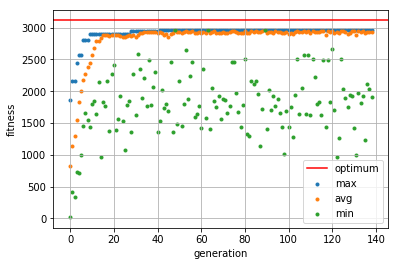

In [5]:
N_POP = 100
CXPB = 0.6
INDPB = 0.001

toolbox = base.Toolbox()
toolbox.register('attr_item', random.randint, 0, 1)
toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.attr_item, instance.name[0])
toolbox.register('population', tools.initRepeat, list, toolbox.individual)
toolbox.register('mate', tools.cxTwoPoint)
toolbox.register('mutate', tools.mutFlipBit, indpb=INDPB)
toolbox.register('select', tools.selTournament, tournsize=3)
toolbox.register('evaluate', ga.evaluate_correction, weights=instance['weights'],
                 values=instance['values'], m=instance['m'])

population = toolbox.population(n=N_POP)
population, logbook, halloffame = ga.genetic_algorithm(
    population, toolbox, early_stop=(1, 50), cxpb=CXPB, mutpb=1, elitism=1, verbose=True
)

plot_ga_progress(logbook, instance['value'])

best = halloffame[0]
print(best)
print(instance['solution'])
c_apx = best.fitness.values[0]
instance['value'], c_apx, relative_error(instance['value'], c_apx)

pyplot.savefig('report/evolution.pdf')

## penalization

[0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


(3115, 2945.0, 0.054574638844301769)

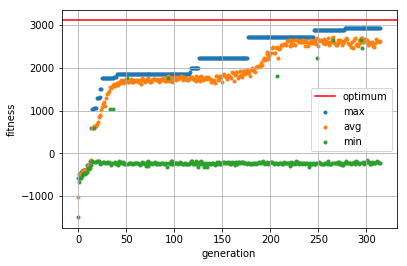

In [6]:
N_POP = 100
CXPB = 0.6
INDPB = 0.001

toolbox = base.Toolbox()
toolbox.register('attr_item', random.randint, 0, 1)
toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.attr_item, instance.name[0])
toolbox.register('population', tools.initRepeat, list, toolbox.individual)
toolbox.register('mate', tools.cxTwoPoint)
toolbox.register('mutate', tools.mutFlipBit, indpb=INDPB)
toolbox.register('select', tools.selRoulette)
toolbox.register('evaluate', ga.evaluate_penalization, weights=instance['weights'],
                 values=instance['values'], m=instance['m'])


population = toolbox.population(n=N_POP)
population, logbook, halloffame = ga.genetic_algorithm(
    population, toolbox, early_stop=(1, 50), cxpb=CXPB, mutpb=1, elitism=1
)

plot_ga_progress(logbook, instance['value'])
print(best)
print(instance['solution'])
c_apx = halloffame[0].fitness.values[0]
instance['value'], c_apx, relative_error(instance['value'], c_apx)